In [1]:
import pandas as pd 


In [2]:
data = pd.read_csv("C:\\Users\\kuppa\\Downloads\\Nomissingfinal_030123.csv")
data

,OBJECTID_12,GEOID10,NAME10,INTPTLAT10,INTPTLON10,FIPS,NAME,STANDARD,FILEID,UI,...,notproficientinEnglishApril2022,FemalesApril2022,RuralApril2022,PovertyratApril2022,DisabilityApril2022,Republicannumber,Republicanpercent,Democraticnumber,DemocraticPercent,Name_12
0,1277,49025,Kane,37.275118,-111.815413,49025,Kane County,"Kane County, UT",SF1US,49025,...,-0.000862,0.509122,0.549193,0.151333,0.283950,2297,0.3737,1435,0.2335,"Kane County, UT"
1,18,48271,Kinney,29.347086,-100.417700,48271,Kinney County,"Kinney County, TX",SF1US,48271,...,0.035185,0.439468,0.204558,0.108750,0.284717,781,0.3098,610,0.2420,"Kinney County, TX"
2,1938,8053,Hinsdale,37.811625,-107.383405,8053,Hinsdale County,"Hinsdale County, CO",SF1US,8053,...,0.000000,0.495269,1.000000,0.103367,0.087483,277,0.4268,139,0.2142,"Hinsdale County, CO"
3,2853,48301,Loving,31.844936,-103.561229,48301,Loving County,"Loving County, TX",SF1US,48301,...,-0.095238,0.419472,1.000000,1.659300,1.659300,26,0.4561,14,0.2456,"Loving County, TX"
4,1878,16059,Lemhi,44.928789,-113.887841,16059,Lemhi County,"Lemhi County, ID",SF1US,16059,...,0.010080,0.501615,0.611391,0.239767,0.265033,2955,0.4459,1041,0.1571,"Lemhi County, ID"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,409,35033,Mora,35.982841,-104.921898,35033,Mora County,"Mora County, NM",SF1US,35033,...,-0.007513,0.488339,1.000000,0.303800,0.611600,1269,0.3825,771,0.2324,"Mora County, NM"
3092,1474,8039,Elbert,39.310817,-104.117927,8039,Elbert County,"Elbert County, CO",SF1US,8039,...,0.009905,0.486619,1.000000,0.046583,0.204667,7919,0.3730,5067,0.2387,"Elbert County, CO"
3093,2819,51007,Amelia,37.336131,-77.973218,51007,Amelia County,"Amelia County, VA",SF1US,51007,...,0.015291,0.499927,1.000000,0.145117,0.317650,4426,0.4133,2192,0.2047,"Amelia County, VA"
3094,1399,51101,King William,37.708260,-77.091054,51101,King William County,"King William County, VA",SF1US,51101,...,0.006637,0.508300,0.832131,0.036450,0.293483,4637,0.3245,3722,0.2605,"King William County, VA"


In [4]:
data.shape

(3096, 242)

In [6]:
data.columns


Index(['OBJECTID_12', 'GEOID10', 'NAME10', 'INTPTLAT10', 'INTPTLON10', 'FIPS',
       'NAME', 'STANDARD', 'FILEID', 'UI',
       ...
       'notproficientinEnglishApril2022', 'FemalesApril2022', 'RuralApril2022',
       'PovertyratApril2022', 'DisabilityApril2022', 'Republicannumber',
       'Republicanpercent', 'Democraticnumber', 'DemocraticPercent',
       'Name_12'],
      dtype='object', length=242)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Columns: 242 entries, OBJECTID_12 to Name_12
dtypes: float64(127), int64(97), object(18)
memory usage: 5.7+ MB


In [10]:
data.dtypes

OBJECTID_12            int64
GEOID10                int64
NAME10                object
INTPTLAT10           float64
INTPTLON10           float64
                      ...   
Republicannumber       int64
Republicanpercent    float64
Democraticnumber       int64
DemocraticPercent    float64
Name_12               object
Length: 242, dtype: object

In [11]:
target_variable = 'Series_Complete_Pop_Pct_x'

In [12]:
# Step 1: Demographics Model
demographics = [
    'Census2019_5PlusPop_x', 'Census2019_5to17Pop_x', 'Census2019_12PlusPop_x', 
    'Census2019_18PlusPop_x', 'Census2019_65PlusPop_x', 'below18yearsofage2019_x', 
    'older65over2019_x', 'below18yearsofage2020', 'older65over2020', 
    'below18yearsofageApril2022', 'older65overApril2022', 'Asian2019_x', 
    'Asian2020', 'AsianApril2022', 'AmericanIndian_AlaskaNative2019', 
    'AmericanIndian_AlaskaNative2020', 'AmericanIndian_AlaskaNativeApri', 
    'Females2019_x', 'Females2020', 'FemalesApril2022'
]

In [13]:
import statsmodels.api as sm

In [14]:
x_demographics = sm.add_constant(data[demographics])

In [15]:
model_1 = sm.OLS(data[target_variable], x_demographics).fit()

In [16]:
print("Demographics_Rsquared:", model_1.rsquared)

Demographics_Rsquared: 0.26123261930550956


In [17]:
# Step 2: Demographics + Social Determinants Model
social_determinants = [
    'Highschoolcompletion2019_x', 'Highschoolcompletion2020', 
    'HighschoolcompletionApril2022', 'notproficientinEnglish2019_x', 
    'notproficientinEnglish2020', 'notproficientinEnglishApril2022', 
    'Unemployment2019_x', 'Unemployment2020', 'UnemploymentApril2022', 
    'Trafficvolume2019_x', 'Trafficvolume2020', 'TrafficvolumeApril2022', 
    'Childreninpoverty2019_x', 'Childreninpoverty2020', 'ChildreninpovertyApril2022', 
    'Childreninsingleparenthousehold', 'Childreninsingleparenthouseho_1', 
    'Childreninsingleparenthouseho_2', 'Medianhouseholdincome2019_x', 
    'Medianhouseholdincome2020', 'MedianhouseholdincomeApril2022'
]

In [18]:
x_sdoh = sm.add_constant(data[demographics+social_determinants])

In [19]:
model_2 = sm.OLS(data[target_variable], x_sdoh).fit()

In [20]:
print("SDOH_Rsquared:", model_2.rsquared)

SDOH_Rsquared: 0.4620042672867739


In [21]:
# Step 3: Demographics + Social Determinants + Health Factors Model
health_factors = [
    'Disability2019_x', 'Disability2022', 'DisabilityApril2022', 
    'Lifeexpectancy2019_x', 'Lifeexpectancy2020', 'LifeexpectancyApril2022', 
    'Prematureageadjustedmortality20', 'Prematureageadjustedmortality_1', 
    'PrematureageadjustedmortalityAp'
]

In [22]:
x_health = sm.add_constant(data[demographics+social_determinants+health_factors])

In [24]:
model_3 = sm.OLS(data[target_variable], x_health).fit()

In [25]:
print("Health_Rsquared:", model_3.rsquared)

Health_Rsquared: 0.47193581944373986


In [26]:
political_leaning = [
    'Republicanpercent', 'DemocraticPercent'
]

In [28]:
x_political = sm.add_constant(data[demographics+social_determinants+health_factors+political_leaning])

In [29]:
model_4 = sm.OLS(data[target_variable], x_political).fit()

In [30]:
print("Political_Rsquared:", model_4.rsquared)

Political_Rsquared: 0.5056303078712133


In [32]:
# Print the statistical significance of political leaning factors
print("\nStatistical significance of Political Leaning factors:")
print(model_4.summary().tables[1])


Statistical significance of Political Leaning factors:
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.7275      7.165     -0.520      0.603     -17.775      10.320
Census2019_5PlusPop_x            8.337e+05   2.16e+06      0.386      0.700    -3.4e+06    5.07e+06
Census2019_5to17Pop_x           -8.337e+05   2.16e+06     -0.386      0.700   -5.07e+06     3.4e+06
Census2019_12PlusPop_x              0.0002      0.000      0.700      0.484      -0.000       0.001
Census2019_18PlusPop_x          -8.337e+05   2.16e+06     -0.386      0.700   -5.07e+06     3.4e+06
Census2019_65PlusPop_x           2.897e-06   2.62e-05      0.111      0.912   -4.85e-05    5.43e-05
below18yearsofage2019_x         -1.045e+05   4.67e+05     -0.224      0.823   -1.02e+06    8.11e+05
older65over2019_x               -7.541e+04  

# EDA

In [33]:
data.head()

,OBJECTID_12,GEOID10,NAME10,INTPTLAT10,INTPTLON10,FIPS,NAME,STANDARD,FILEID,UI,...,notproficientinEnglishApril2022,FemalesApril2022,RuralApril2022,PovertyratApril2022,DisabilityApril2022,Republicannumber,Republicanpercent,Democraticnumber,DemocraticPercent,Name_12
0,1277,49025,Kane,37.275118,-111.815413,49025,Kane County,"Kane County, UT",SF1US,49025,...,-0.000862,0.509122,0.549193,0.151333,0.283950,2297,0.3737,1435,0.2335,"Kane County, UT"
1,18,48271,Kinney,29.347086,-100.417700,48271,Kinney County,"Kinney County, TX",SF1US,48271,...,0.035185,0.439468,0.204558,0.108750,0.284717,781,0.3098,610,0.2420,"Kinney County, TX"
2,1938,8053,Hinsdale,37.811625,-107.383405,8053,Hinsdale County,"Hinsdale County, CO",SF1US,8053,...,0.000000,0.495269,1.000000,0.103367,0.087483,277,0.4268,139,0.2142,"Hinsdale County, CO"
3,2853,48301,Loving,31.844936,-103.561229,48301,Loving County,"Loving County, TX",SF1US,48301,...,-0.095238,0.419472,1.000000,1.659300,1.659300,26,0.4561,14,0.2456,"Loving County, TX"
4,1878,16059,Lemhi,44.928789,-113.887841,16059,Lemhi County,"Lemhi County, ID",SF1US,16059,...,0.010080,0.501615,0.611391,0.239767,0.265033,2955,0.4459,1041,0.1571,"Lemhi County, ID"


In [34]:
data.describe()

,OBJECTID_12,GEOID10,INTPTLAT10,INTPTLON10,FIPS,UI,FIPS_1,Completeness_pct_x,Administered_Dose1_Recip_x,Administered_Dose1_Pop_Pct_x,...,NonHispanicWhiteApril2022,notproficientinEnglishApril2022,FemalesApril2022,RuralApril2022,PovertyratApril2022,DisabilityApril2022,Republicannumber,Republicanpercent,Democraticnumber,DemocraticPercent
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3.096000e+03,3096.000000,...,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3.096000e+03,3096.000000,3.096000e+03,3096.000000
mean,1553.906008,30749.049096,38.278969,-91.601765,30749.049096,30749.049096,30744.074289,94.792377,7.643908e+04,57.121221,...,0.754305,0.014855,0.499546,0.585355,0.139481,0.310182,2.269165e+04,0.365797,2.606790e+04,0.230053
std,897.614956,14962.975037,4.844293,11.394920,14962.975037,14962.975037,14959.939717,4.619113,2.741177e+05,16.009195,...,0.200267,0.027078,0.022406,0.314241,0.075619,0.092828,5.370651e+04,0.074752,9.781962e+04,0.066404
min,1.000000,1001.000000,25.601043,-124.211406,1001.000000,1001.000000,1001.000000,73.500000,0.000000e+00,0.000000,...,0.027255,-0.095238,0.279948,0.000000,-0.126300,-0.175683,2.600000e+01,0.069900,1.400000e+01,0.067100
25%,775.750000,19054.500000,34.675292,-97.956729,19054.500000,19054.500000,19054.500000,93.475000,5.649500e+03,47.900000,...,0.635678,0.001408,0.493454,0.334298,0.092588,0.248983,3.362250e+03,0.321175,1.829000e+03,0.194500
50%,1552.500000,29224.000000,38.319946,-90.132265,29224.000000,29224.000000,29222.000000,96.800000,1.424850e+04,56.400000,...,0.824946,0.006439,0.503376,0.594437,0.127842,0.301042,7.553000e+03,0.369750,4.686500e+03,0.226300
75%,2331.250000,46015.500000,41.709094,-83.372924,46015.500000,46015.500000,46013.500000,97.800000,4.244700e+04,66.000000,...,0.917081,0.017302,0.511302,0.870863,0.172300,0.363296,1.904450e+04,0.411550,1.375450e+04,0.267125
max,3108.000000,56045.000000,48.842653,-67.609354,56045.000000,56045.000000,56045.000000,98.900000,8.111745e+06,95.000000,...,0.979818,0.304150,0.573037,1.000000,1.659300,1.659300,1.160964e+06,0.544200,3.035538e+06,0.510300


In [35]:
#check for missing values
data.isnull().sum()

OBJECTID_12          0
GEOID10              0
NAME10               0
INTPTLAT10           0
INTPTLON10           0
                    ..
Republicannumber     0
Republicanpercent    0
Democraticnumber     0
DemocraticPercent    0
Name_12              0
Length: 242, dtype: int64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

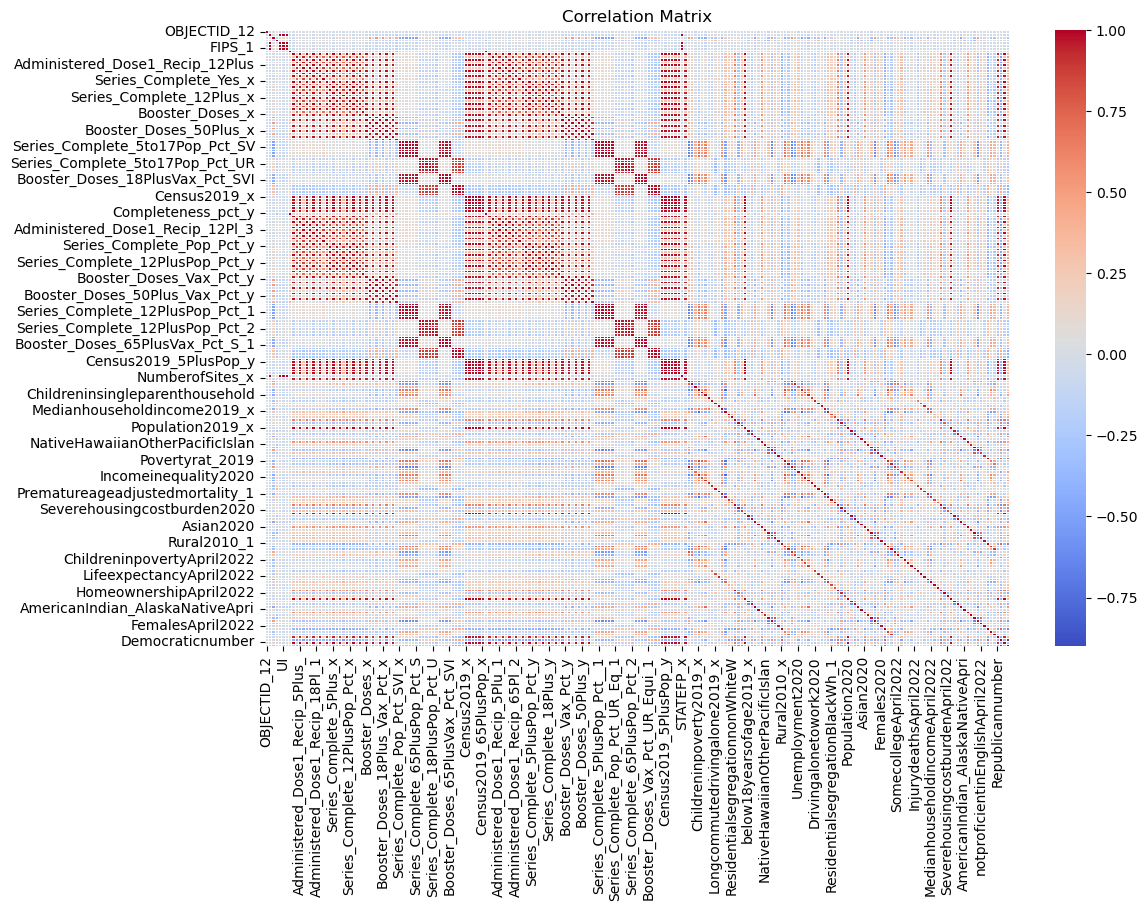

In [40]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap = "coolwarm", annot=False , linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

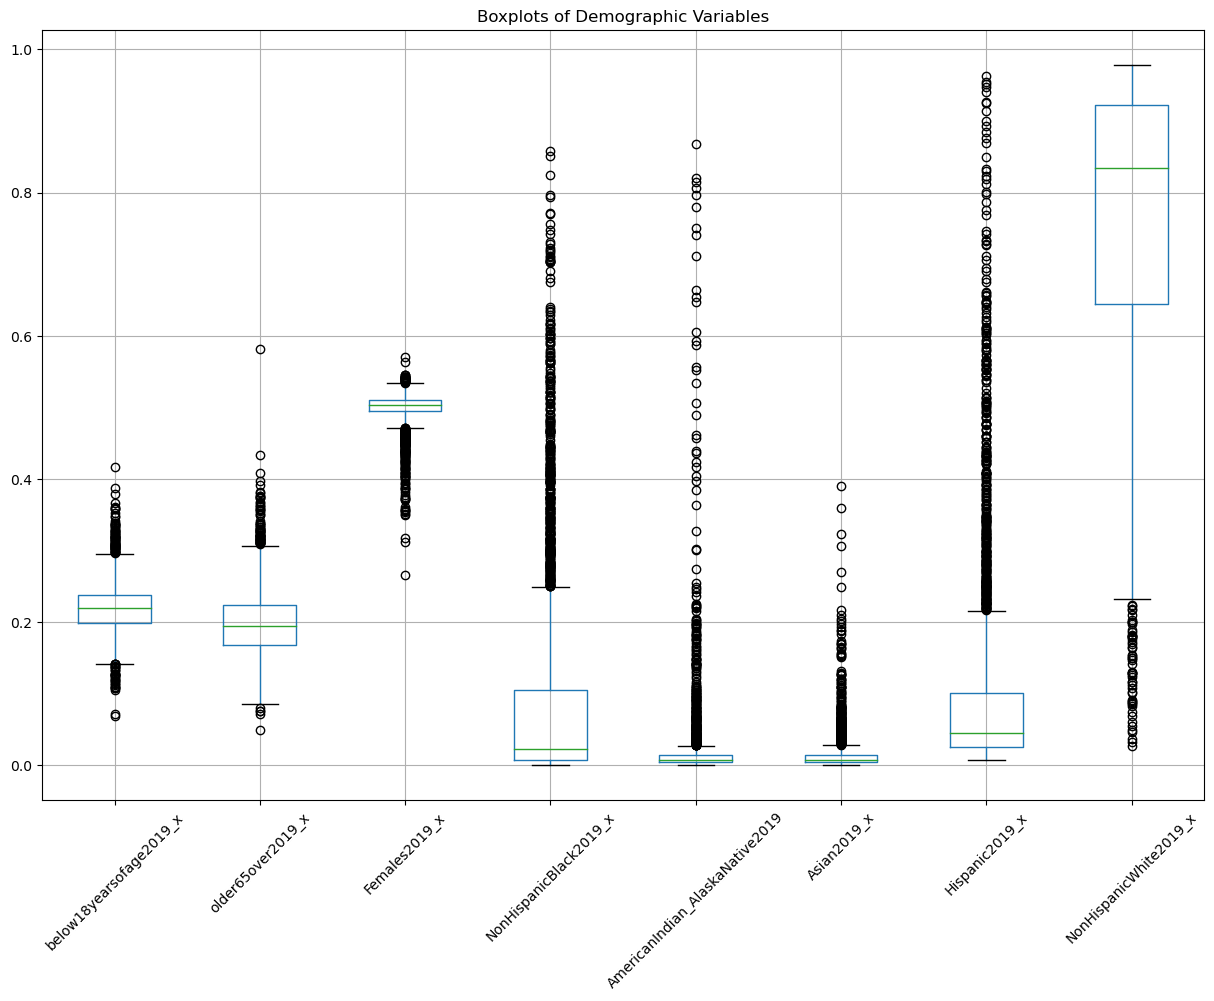

In [41]:
# Boxplots for demographic variables
demographic_columns = [
    'below18yearsofage2019_x', 'older65over2019_x', 'Females2019_x', 
    'NonHispanicBlack2019_x', 'AmericanIndian_AlaskaNative2019', 
    'Asian2019_x', 'Hispanic2019_x', 'NonHispanicWhite2019_x'
]
plt.figure(figsize=(15, 10))
data[demographic_columns].boxplot()
plt.title("Boxplots of Demographic Variables")
plt.xticks(rotation=45)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


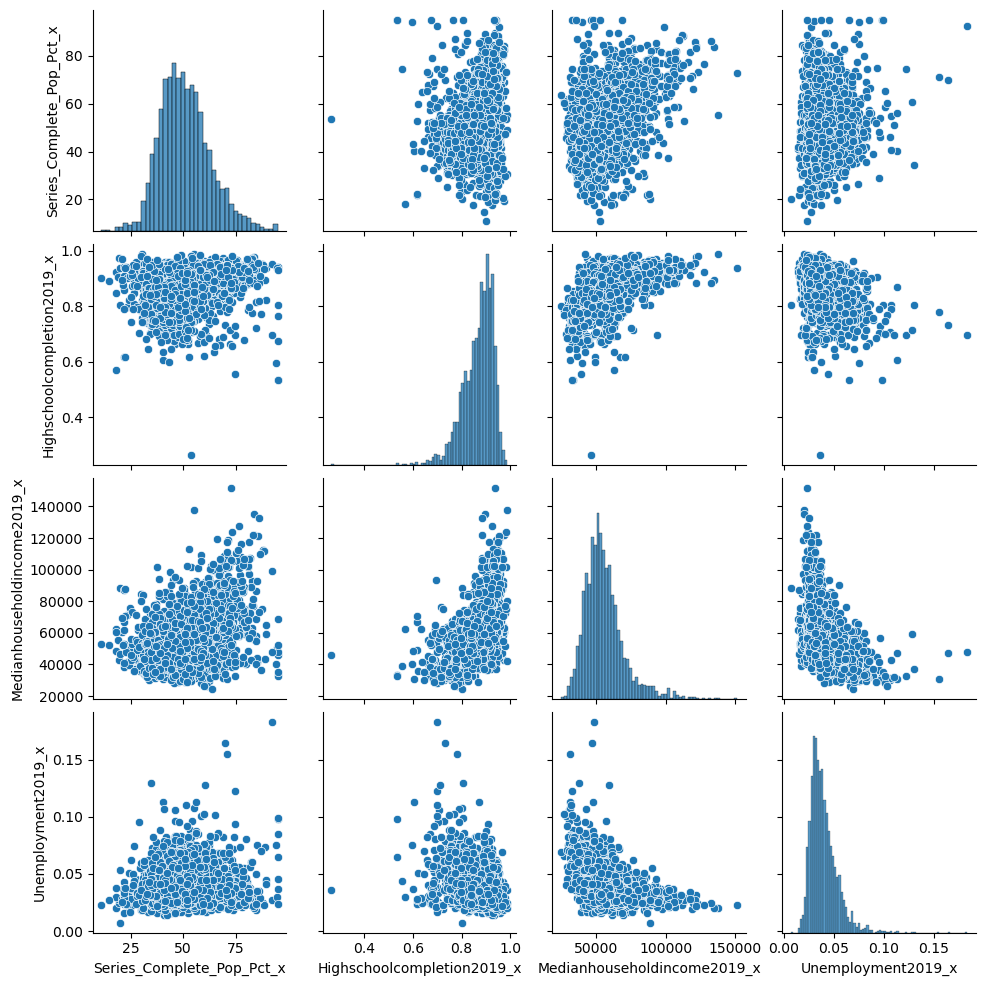

In [42]:
# Pairplot for a subset of relevant features
subset_columns = ['Series_Complete_Pop_Pct_x', 'Highschoolcompletion2019_x', 
                  'Medianhouseholdincome2019_x', 'Unemployment2019_x']
sns.pairplot(data[subset_columns])
plt.show()

# ML

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Define the target and features
target = 'Series_Complete_Pop_Pct_x'
features = [
    'Highschoolcompletion2019_x', 'Medianhouseholdincome2019_x', 
    'Unemployment2019_x', 'Disability2019_x', 'Lifeexpectancy2019_x', 
    'Republicanpercent', 'DemocraticPercent'
]

In [45]:
X = data[features]
y = data[target]

In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
#Linear regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [49]:
# Evaluation for Linear Regression
print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R-squared:", r2_score(y_test, y_pred_lin))


Linear Regression Results:
Mean Squared Error: 89.69905960509034
R-squared: 0.37013731385508464


In [50]:
# 2. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation for Random Forest
print("\nRandom Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))


Random Forest Results:
Mean Squared Error: 81.13850747039827
R-squared: 0.4302491186630668


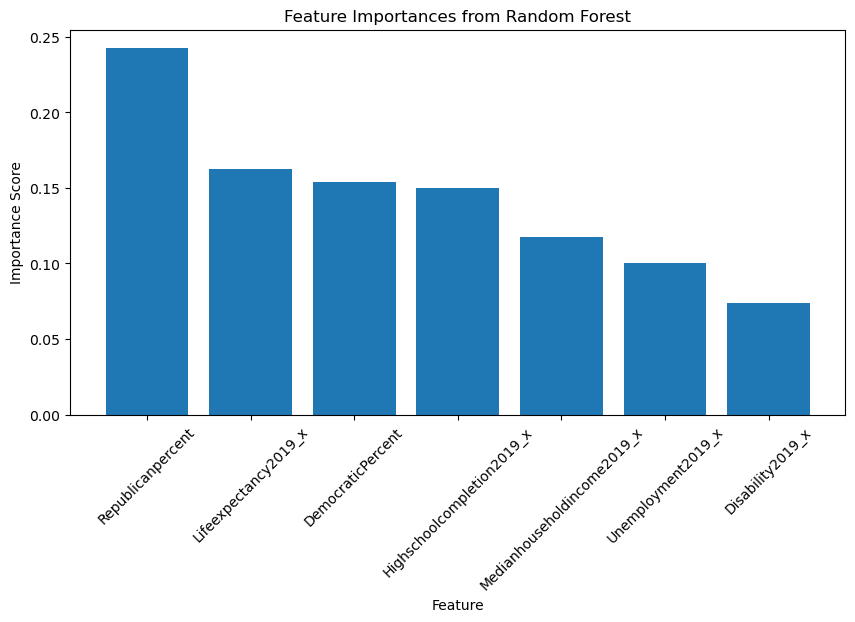

In [51]:
# Feature Importance from Random Forest
plt.figure(figsize=(10, 5))
importances = rf_reg.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.bar([features[i] for i in indices], [importances[i] for i in indices])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()